<h1 style="color: #087EB0;font-family: Arial;  font-size: 30px;  padding: 10px;">Know Your Customer: Unlocking CRM Secrets with Data</h1>

In [ ]:
# Lets import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.metrics import silhouette_score
from datetime import timedelta
from sklearn.cluster import KMeans # modeling
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Let's find the excel path.

import os
os.getcwd()

'C:\\Users\\fatma\\Desktop\\Kodlasam Veri Bilimi\\Machine Learning\\CRM_Project'

<h2 style="color:#6495ed ;font-family: Arial;  font-size: 24px;  padding: 10px;"> 1. Data Exploration and Preprocessing</h2>

* Load the dataset and view the first few rows to understand its overall structure.
* Identify and clean missing data, outliers, and data type issues.
* Unique customer IDs and make the data analyzable.

In [ ]:
df = pd.read_excel("Online Retail.xlsx")

In [ ]:
df.head(4)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

<h2 style="color:#4682b4 ;font-family: Arial;  font-size: 19px;  padding: 10px;"> Variable Description</h2>

* __InvoiceNo__: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
* __StockCode__: Product code that consists 5 digits.
* __Description__: Product name.
* __Quantity__: The quantities of each product per transaction.
* __InvoiceDate__: Represents the day and time when each transaction was generated.
* __UnitPrice__: Product price per unit.
* __CustomerID__: Customer number that consists 5 digits. Each customer has a unique customer ID.
* __Country__: Name of the country where each customer resides.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

* Detect and clean missing data, outliers, and data type issues.

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Calculating the Missing Values % contribution in df

df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [ ]:
# Dropping the null values in the dataset.

df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Changing the datatype of Customer Id as per Business understanding

df['CustomerID'] = df['CustomerID'].astype(str)

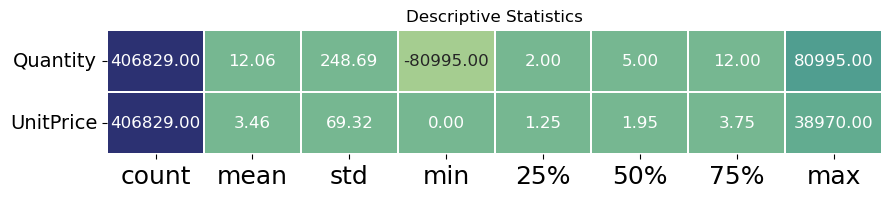

In [ ]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index= dataframe.columns,
                           columns= dataframe.describe().T.columns,
                           data= dataframe.describe().T)

    f,ax = plt.subplots(figsize=(10,desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot = True,
                cmap = "crest",
                fmt = '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.1,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 12)
    plt.show()

desc_stats(df.select_dtypes(include = [float, int]))

In [ ]:
df.describe()

Quantity      UnitPrice
count  406829.000000  406829.000000
mean       12.061303       3.460471
std       248.693370      69.315162
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000

<Axes: >

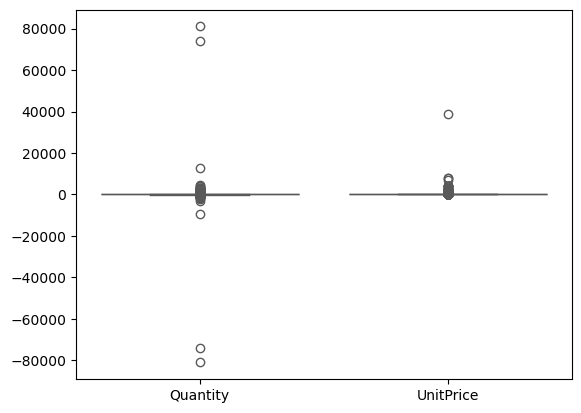

In [ ]:
# Before IQR: Quantity ve UnitPrice

sns.boxplot(df[["Quantity","UnitPrice"]],palette = "Set2")

In [ ]:
# IQR calculation (for Quantity and UnitPrice )

Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

# Calculate lower and upper bound
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

# Replacing Outliers with Boundaries (Winsorizing)
df['Quantity'] = df['Quantity'].clip(lower=lower_bound_quantity, upper=upper_bound_quantity)
df['UnitPrice'] = df['UnitPrice'].clip(lower=lower_bound_unitprice, upper=upper_bound_unitprice)

<Axes: >

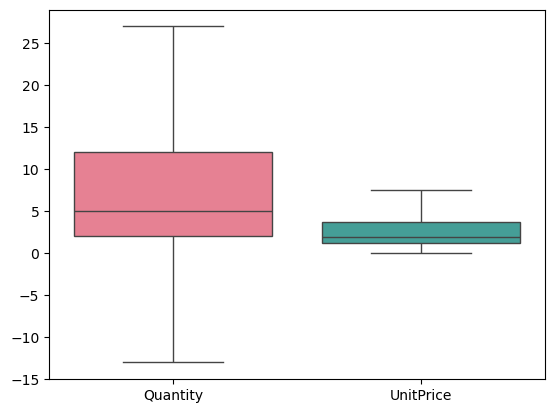

In [ ]:
# Quantity and UnitPrice
sns.boxplot(df[["Quantity","UnitPrice"]],palette = "husl")

<h2 style="color:#4682b4 ;font-family: Arial;  font-size: 15px;  padding: 10px;"> Let's find the total amount customers paid for the products they bought.</h2>

* First let's find Quantity* UnitPrice


In [ ]:
# Calculate total price and adding it.

df["Total_Price"] = df["Quantity"] * df["UnitPrice"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   Total_Price  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


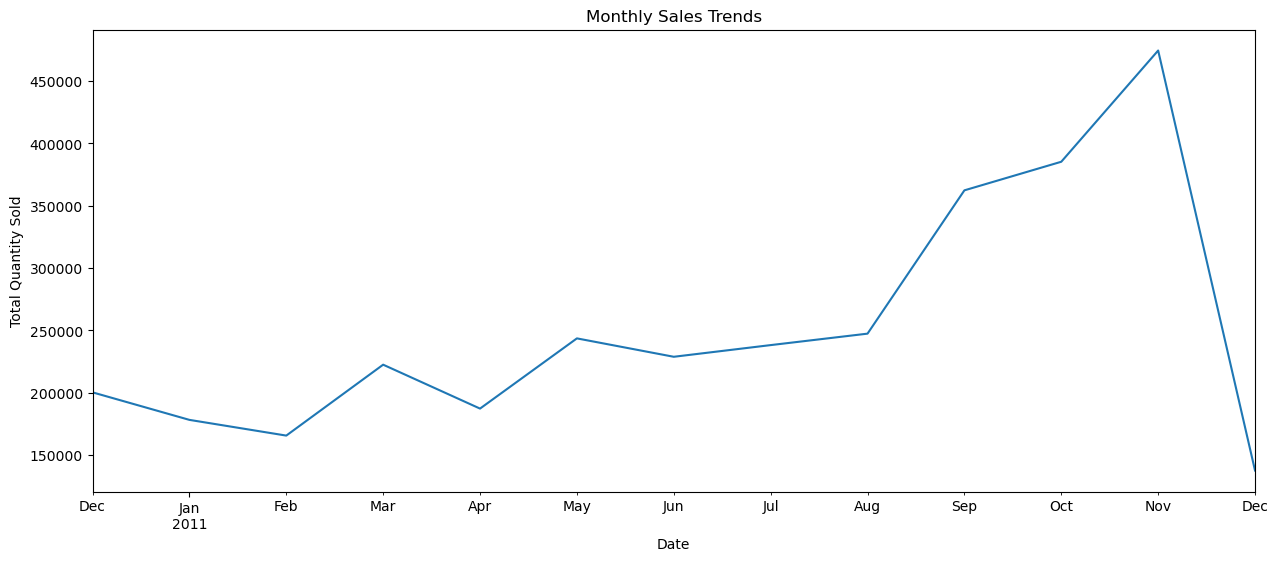

In [ ]:
# Visualize sales trends over time

plt.figure(figsize=(15, 6))
df.set_index('InvoiceDate').resample('M').sum()['Quantity'].plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()

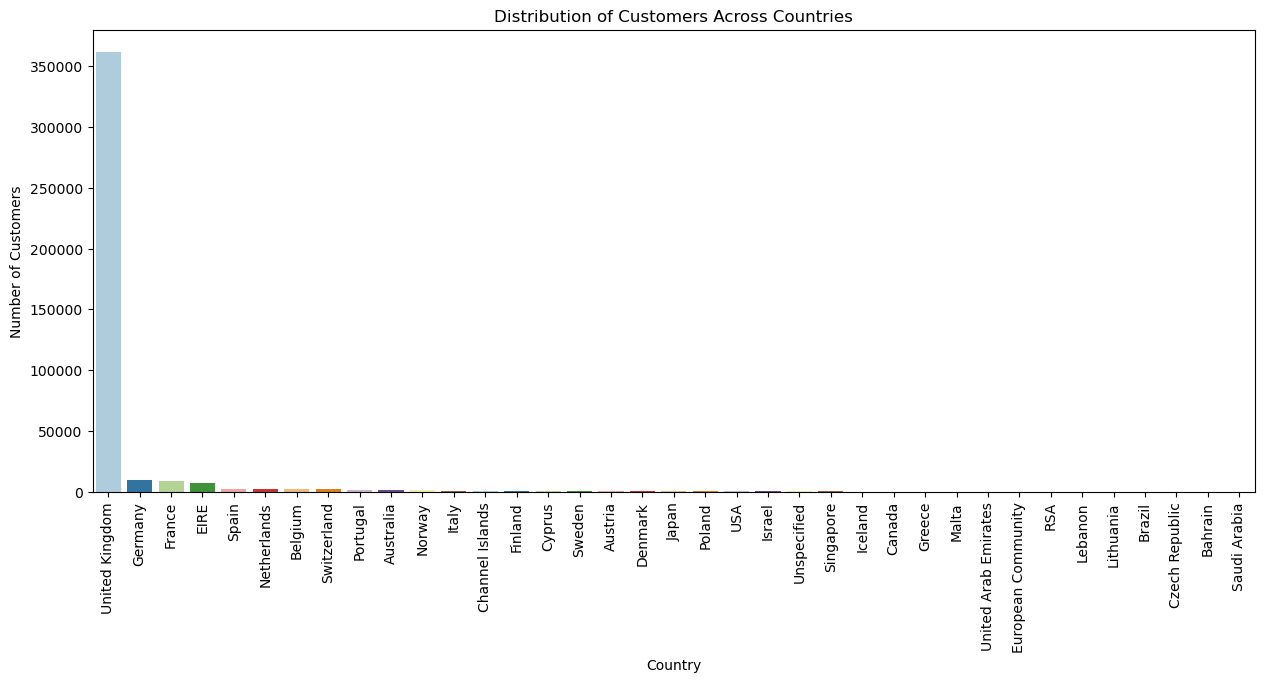

In [ ]:
# Visualize the distribution of customers across countries

plt.figure(figsize=(15, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, palette = 'Paired')
plt.title('Distribution of Customers Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cust_num = df.groupby("Country")["CustomerID"].count()

In [ ]:
cust_num_dict = cust_num.to_dict()
cust_num_df = pd.DataFrame(list(cust_num_dict.items()), columns=["Country", "Customer_Number"])

In [ ]:
cust_num_df= dict(zip(cust_num_df['Country'].tolist(), cust_num_df['Customer_Number'].tolist()))

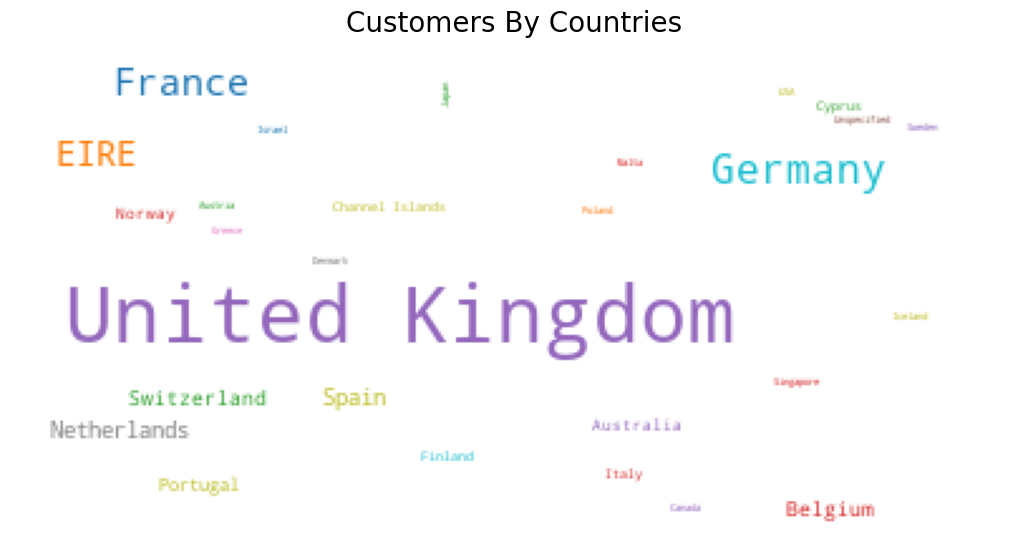

In [ ]:
#Define a list of stop words

stopwords = ['Country', 'CustomerID']

#A function to generate the word cloud from text

def generate_wordcloud_frequencies(data, title):
    cloud = WordCloud(width=400,
                      height=200,
                      background_color="white",
                      max_words=150,
                      colormap='tab10',
                      stopwords=stopwords,
                      collocations=True).generate_from_frequencies(data)
    plt.figure(figsize=(13, 13))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

#Use the function to generate the wordcloud by fequencies

generate_wordcloud_frequencies(cust_num_df, 'Customers By Countries')

In [ ]:
price_num = df.groupby("Country")["Total_Price"].sum()

In [ ]:
price_num = price_num.to_dict()
price_num_df = pd.DataFrame(list(price_num.items()), columns=["Country", "Total_Price"])

In [ ]:
price_num_df= dict(zip(price_num_df['Country'].tolist(), price_num_df['Total_Price'].tolist()))

In [ ]:
price_num_df

{'Australia': 47724.5,
 'Austria': 7864.61,
 'Bahrain': 390.8,
 'Belgium': 35206.28,
 'Brazil': 1079.4,
 'Canada': 2425.08,
 'Channel Islands': 16102.16,
 'Cyprus': 10238.37,
 'Czech Republic': 639.32,
 'Denmark': 13439.79,
 'EIRE': 161640.32,
 'European Community': 1170.05,
 'Finland': 15189.73,
 'France': 158201.14,
 'Germany': 181372.39,
 'Greece': 4129.93,
 'Iceland': 3877.44,
 'Israel': 5684.12,
 'Italy': 14400.880000000001,
 'Japan': 13035.43,
 'Lebanon': 1432.88,
 'Lithuania': 1549.01,
 'Malta': 1895.58,
 'Netherlands': 91703.24,
 'Norway': 26804.68,
 'Poland': 6365.54,
 'Portugal': 25453.64,
 'RSA': 921.86,
 'Saudi Arabia': 131.17,
 'Singapore': 7224.52,
 'Spain': 40552.83,
 'Sweden': 12162.26,
 'Switzerland': 43717.61,
 'USA': 1745.28,
 'United Arab Emirates': 1597.42,
 'United Kingdom': 4923824.384,
 'Unspecified': 2534.89}

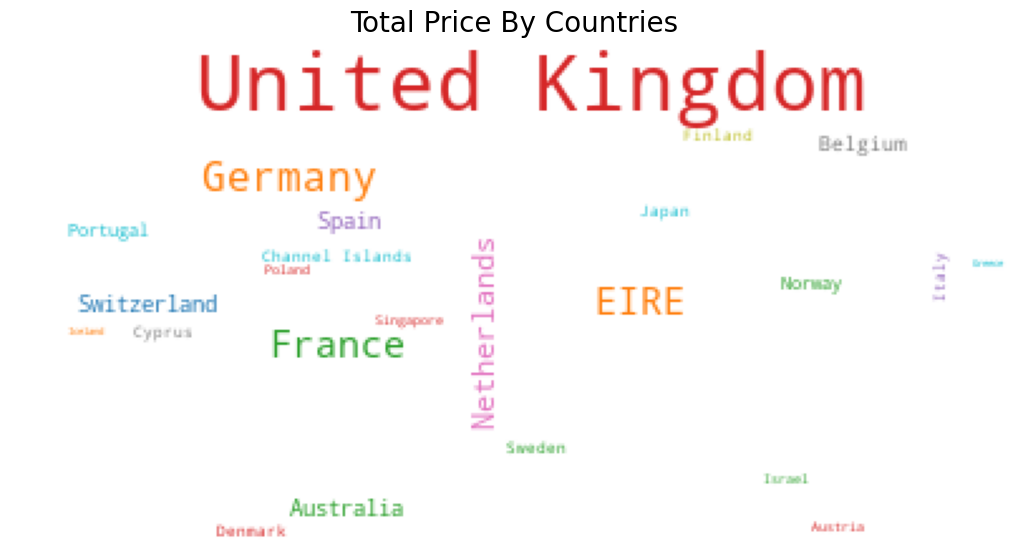

In [ ]:
# Define a list of stop words

stopwords = ['Country', 'Total_Price']

# A function to generate the word cloud from text

def generate_wordcloud_frequencies(data, title):
    cloud = WordCloud(width=400,
                      height=200,
                      background_color="white",
                      max_words=150,
                      colormap='tab10',
                      stopwords=stopwords,
                      collocations=True).generate_from_frequencies(data)
    plt.figure(figsize=(13, 13))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

#Use the function to generate the wordcloud by fequencies

generate_wordcloud_frequencies(price_num_df, 'Total Price By Countries')

<h2 style="color:#6495ed ;font-family: Arial;  font-size: 24px;  padding: 10px;"> 2. Customer Segmentation </h2>

In [ ]:
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


In [ ]:
# Assign "todays_date" as 2 days after the last transaction date of purchase:

todays_date = df["InvoiceDate"].max() + timedelta(days=2)
todays_date

Timestamp('2011-12-11 12:50:00')

<h2 style="color:#4682b4 ;font-family: Arial;  font-size: 15px;  padding: 10px;"> Let's create a new df called as rfm_df by calculating the Recency, Frequency and Monetary values.</h2>

* __Recency__ : the number of days between performans_date and the last purchase date of each customers
* __Frequency__: the number of transactions (unique invoices) of each customers
* __Monetary__ : the sum of TotalPrice of each customers.

In [ ]:
rfm_df = df.groupby("CustomerID").agg \
                                    ({"InvoiceDate" : lambda InvoiceDate :(todays_date - InvoiceDate.max()).days,  # Recency
                                     "InvoiceNo" : lambda InvoiceNo: InvoiceNo.nunique(),  # Frequency
                                     "Total_Price":  lambda Total_Price: Total_Price.sum()})    # Monetary

In [ ]:
rfm_df.head()

InvoiceDate  InvoiceNo  Total_Price
CustomerID                                     
12346.0             327          2        14.56
12347.0               3          7      3877.44
12348.0              76          4       557.57
12349.0              20          1      1336.65
12350.0             311          1       301.90

In [ ]:
# Replace column names with Recency, Frequency and Monetary:

rfm_df.columns = ['recency', 'frequency', 'monetary']
rfm_df.head()

recency  frequency  monetary
CustomerID                              
12346.0         327          2     14.56
12347.0           3          7   3877.44
12348.0          76          4    557.57
12349.0          20          1   1336.65
12350.0         311          1    301.90

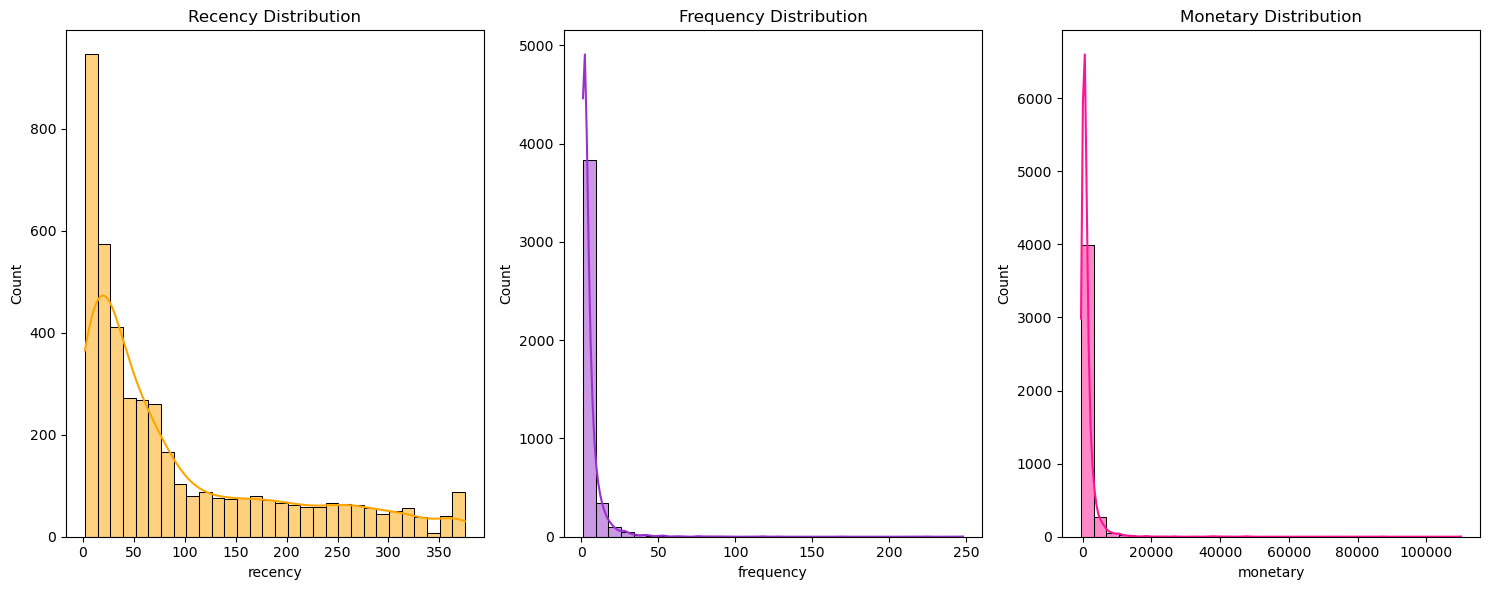

In [ ]:
# Visualize RFM values

plt.figure(figsize=(15, 6))

plt.subplot(131)
sns.histplot(rfm_df['recency'], bins=30, kde=True,color='orange')

plt.title('Recency Distribution')

plt.subplot(132)
sns.histplot(rfm_df['frequency'], bins=30, kde=True,color='darkorchid')
plt.title('Frequency Distribution')

plt.subplot(133)
sns.histplot(rfm_df['monetary'], bins=30, kde=True,color='deeppink')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [ ]:
rfm_df["Recency_Score"]  = pd.qcut(rfm_df['recency'], 5, [5, 4, 3, 2, 1])
rfm_df["Frequency_Score"]  = pd.qcut(rfm_df['frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm_df["Monetary_Score"]  = pd.qcut(rfm_df['monetary'], 5, [1, 2, 3, 4, 5])

In [ ]:
rfm_df["RF_SCORE"] = (rfm_df['Recency_Score'].astype(str) +
                    rfm_df['Frequency_Score'].astype(str))

rfm_df.head()

recency  frequency  monetary Recency_Score Frequency_Score  \
CustomerID                                                               
12346.0         327          2     14.56             1               2   
12347.0           3          7   3877.44             5               4   
12348.0          76          4    557.57             2               3   
12349.0          20          1   1336.65             4               1   
12350.0         311          1    301.90             1               1   

           Monetary_Score RF_SCORE  
CustomerID                          
12346.0                 1       12  
12347.0                 5       54  
12348.0                 3       23  
12349.0                 4       41  
12350.0                 2       11

In [ ]:
rfm_df['Segment'] = rfm_df['RF_SCORE']
rfm_df.head()

recency  frequency  monetary Recency_Score Frequency_Score  \
CustomerID                                                               
12346.0         327          2     14.56             1               2   
12347.0           3          7   3877.44             5               4   
12348.0          76          4    557.57             2               3   
12349.0          20          1   1336.65             4               1   
12350.0         311          1    301.90             1               1   

           Monetary_Score RF_SCORE Segment  
CustomerID                                  
12346.0                 1       12      12  
12347.0                 5       54      54  
12348.0                 3       23      23  
12349.0                 4       41      41  
12350.0                 2       11      11

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [ ]:
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df.reset_index(inplace=True)
rfm_df.head()

CustomerID  recency  frequency  monetary Recency_Score Frequency_Score  \
0    12346.0      327          2     14.56             1               2   
1    12347.0        3          7   3877.44             5               4   
2    12348.0       76          4    557.57             2               3   
3    12349.0       20          1   1336.65             4               1   
4    12350.0      311          1    301.90             1               1   

  Monetary_Score RF_SCORE      Segment  
0              1       12  hibernating  
1              5       54    champions  
2              3       23      at_Risk  
3              4       41    promising  
4              2       11  hibernating

In [ ]:
rfm_df.groupby('Segment').agg({"CustomerID":"count"}).sort_values("CustomerID",ascending=False)

CustomerID
Segment                        
hibernating                1058
loyal_customers             811
champions                   645
at_Risk                     607
potential_loyalists         496
about_to_sleep              361
need_attention              184
promising                    99
cant_loose                   70
new_customers                41

In [ ]:
# Assigning colors according to segments

segment_colors = {
    'hibernating': 'darkorange',
    'at_Risk': 'darkseagreen',
    'cant_loose': 'orange',
    'about_to_sleep': 'cyan',
    'need_attention': 'cadetblue',
    'loyal_customers': 'hotpink',
    'promising': 'lightsteelblue',
    'new_customers': 'coral',
    'potential_loyalists': 'mediumaquamarine',
    'champions': 'palegoldenrod'

}
fig = go.Figure()

# Creating a separate trace for each segment

for segment, renk in segment_colors.items():
    segment_data = [i for i, seg in enumerate(rfm_df['Segment']) if seg == segment]
    fig.add_trace(go.Scatter3d(
        x=[rfm_df['Recency_Score'][i] for i in segment_data],
        y=[rfm_df['Frequency_Score'][i] for i in segment_data],
        z=[rfm_df['Monetary_Score'][i] for i in segment_data],
        mode='markers',
        marker=dict(size=8, color=renk),
        name=segment
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()

In [ ]:
rfm_df[["Segment","recency", "frequency", "monetary"]].groupby("Segment").agg(["mean", "count","sum"])

recency                frequency              \
                           mean count     sum       mean count   sum   
Segment                                                                
about_to_sleep        53.401662   361   19278   1.288089   361   465   
at_Risk              158.522241   607   96223   3.317957   607  2014   
cant_loose           132.771429    70    9294   9.771429    70   684   
champions              6.387597   645    4120  14.753488   645  9516   
hibernating          217.993384  1058  230637   1.202268  1058  1272   
loyal_customers       33.057953   811   26810   8.032059   811  6514   
need_attention        50.260870   184    9248   2.625000   184   483   
new_customers          7.560976    41     310   1.000000    41    41   
potential_loyalists   17.241935   496    8552   2.221774   496  1102   
promising             23.535354    99    2330   1.000000    99    99   

                        monetary                     
                            mean count          sum  
Segment                                              
about_to_sleep        379.858504   361   137128.920  
at_Risk               722.833381   607   438759.862  
cant_loose           1776.416714    70   124349.170  
champions            4198.492946   645  2708027.950  
hibernating           310.631844  1058   328648.491  
loyal_customers      2106.104070   811  1708050.401  
need_attention        692.759293   184   127467.710  
new_customers         239.338049    41     9812.860  
potential_loyalists   555.280141   496   275418.950  
promising             260.244646    99    25764.220

In [ ]:
rfm_df.frequency.mean()

5.07548032936871

Now, let's focus on some segments which can be critically important for marketing strategies

* __Champions__: This segment consists of customers most frequently spends and can easily adopt to new products and services, cross-sales strategies can be taken for this segment.

* __Loyal Customers__: There are 811 customers in this segment, and while the purchasing frequency is 5 on average in all customer segments, it has been seen that average purchases are nearly 2 times higher in this segment (average of frequency is 8). The average monetary value of this segment is nearly 50% above the general average.

* __Need_Attention__: There are 184 customers that last purchased nearly 2 months ago in this segment. Although they dont make purchase frequently, total transaction amounts of these customers contribute to profitability. As a result, Cashback and bonus campaigns can be organized for this segment to retain customers and even move them to a segment that makes more purchases. In fact, discounted product offers and campaigns based on gift coupons can be planned by observing habits of other customers with similar behaviors, and analyzing according product association rules.

* __Can't_loose__: Customers of Can't_Loose segment have a higher transaction frequency, even though their spending amounts are close to the loyal customer segment. However, since these customers are nearly lost customers that made last purchases nearly 4 months ago. So, new campaign strategies based on rewards, discounts, and other special incentives as a way to attract and retain customers can be planned in order to make them feel special and loyal again.
* __Hibernating__ :There are 1058 customers in this segment, this segment constituted the majority of the data. These are customers who have not interacted with your brand for a while and have not made a purchase. Regaining and activating these customers is important for your business. Here are some strategies you can do for sleeping customers: personalized emails, special offers and discounts, social media campaigns, etc.

In [ ]:
rfm_df

CustomerID  recency  frequency  monetary Recency_Score Frequency_Score  \
0       12346.0      327          2     14.56             1               2   
1       12347.0        3          7   3877.44             5               4   
2       12348.0       76          4    557.57             2               3   
3       12349.0       20          1   1336.65             4               1   
4       12350.0      311          1    301.90             1               1   
...         ...      ...        ...       ...           ...             ...   
4367    18280.0      279          1    174.50             1               2   
4368    18281.0      182          1     61.92             1               2   
4369    18282.0        9          3    149.51             5               3   
4370    18283.0        5         16   2081.98             5               5   
4371    18287.0       44          3   1520.23             3               3   

     Monetary_Score RF_SCORE              Segment  
0                 1       12          hibernating  
1                 5       54            champions  
2                 3       23              at_Risk  
3                 4       41            promising  
4                 2       11          hibernating  
...             ...      ...                  ...  
4367              1       12          hibernating  
4368              1       12          hibernating  
4369              1       53  potential_loyalists  
4370              5       55            champions  
4371              4       33       need_attention  

[4372 rows x 9 columns]

In [ ]:
rfm_df_kmeans =  rfm_df[["recency","frequency","monetary"]]

In [ ]:
rfm_df_kmeans

recency  frequency  monetary
0         327          2     14.56
1           3          7   3877.44
2          76          4    557.57
3          20          1   1336.65
4         311          1    301.90
...       ...        ...       ...
4367      279          1    174.50
4368      182          1     61.92
4369        9          3    149.51
4370        5         16   2081.98
4371       44          3   1520.23

[4372 rows x 3 columns]

<h2 style="color:#4682b4 ;font-family: Arial;  font-size: 15px;  padding: 10px;"> Create customer segments using K-Means or another clustering algorithm.</h2>

In [ ]:
# Normalize the variables with StandardScaler from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(rfm_df_kmeans)

# Store it separately for clustering

rfm_scaled = scaler.transform(rfm_df_kmeans)

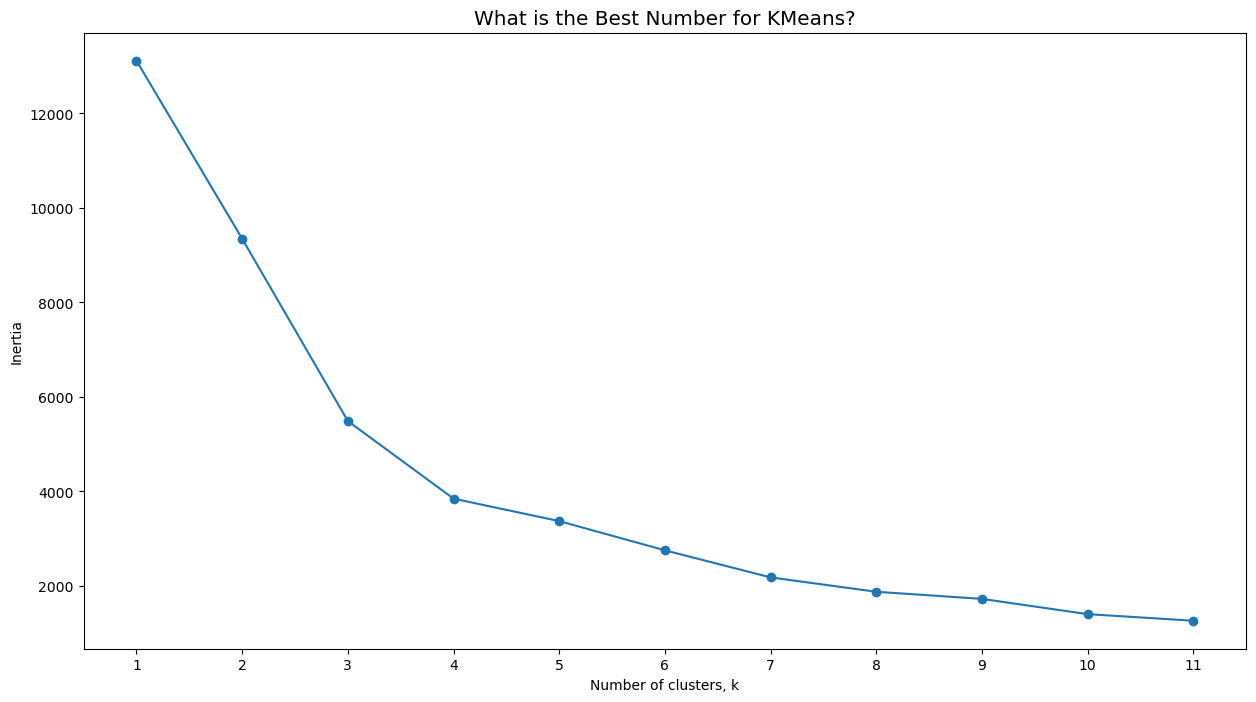

In [ ]:
#First : Get the Best KMeans

ks = range(1, 12)
inertias=[]
for k in ks :
    # Create a KMeans clusters

    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(rfm_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias

f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

<h2 style="color:#4682b4 ;font-family: Arial;  font-size: 15px;  padding: 10px;"> Silhouette Analysis</h2>

silhouette score= p−qmax(p,q)
p is the mean distance to the points in the nearest cluster that the data point is not a part of q
is the mean intra-cluster distance to all the points in its own cluster.
The value of the silhouette score range lies between -1 to 1.
A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score

    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.5296571858526474
For n_clusters=3, the silhouette score is 0.5612886733282266
For n_clusters=4, the silhouette score is 0.5912619565235582
For n_clusters=5, the silhouette score is 0.47776921151932467
For n_clusters=6, the silhouette score is 0.4914791583131909
For n_clusters=7, the silhouette score is 0.4904243686704762
For n_clusters=8, the silhouette score is 0.48954423636319805


In [ ]:
# Final model with n_clusters=4

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
y_kmeans = kmeans.predict(rfm_scaled)

In [ ]:
 kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# Assign the label

rfm_df_kmeans['Cluster_Id'] = kmeans.labels_
rfm_df_kmeans.head()

recency  frequency  monetary  Cluster_Id
0      327          2     14.56           1
1        3          7   3877.44           0
2       76          4    557.57           0
3       20          1   1336.65           0
4      311          1    301.90           1

In [ ]:
# Cluster labels

labels = kmeans.labels_

In [ ]:
labels

array([1, 0, 0, ..., 0, 0, 0])

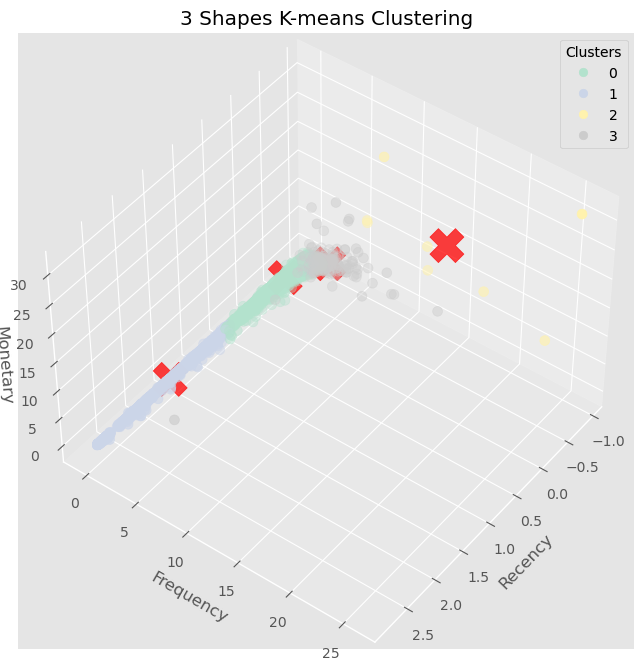

In [ ]:
# 3D visualization

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Coloring clusters

scatter = ax.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], rfm_scaled[:, 2], c= labels, s=50, cmap='Pastel2', zorder=1)

# Show cluster centers

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=600, alpha=0.75, label="Cluster Centers", marker='X', zorder=2)

# Add Legend

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Görüş açısını değiştirme (örneğin, 30 derece yatay, 45 derece dikey)
ax.view_init(elev=45, azim=37)

#ax.legend()
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary', labelpad=.01)
plt.title('3 Shapes K-means Clustering')


plt.show()



<h2 style="color:#4682b4 ;font-family: Arial;  font-size: 15px;  padding: 10px;">Interpretation of Segments</h2>

* Cluster 0: Regular shoppers, high spenders.
* Cluster 1: Customers who shop less but spend more.
* Cluster 2: Customers who shop more than Cluster 3 but spend average.
* Cluster 3: Newcomers, low spenders, low shoppers.

<h2 style="color:#6495ed ;font-family: Arial;  font-size: 24px;  padding: 10px;"> 3. Purchase Propensity Prediction</h2>

* Select appropriate features and prepare data to predict purchase propensity.
* Create a purchase propensity prediction model using logistic regression, decision tree, or other classification algorithm.
* Evaluate the performance of the model and visualize the results.
* Analyze the differences between customers with high and low purchase propensity.

In [ ]:
rfm_df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     4372 non-null   int64  
 1   frequency   4372 non-null   int64  
 2   monetary    4372 non-null   float64
 3   Cluster_Id  4372 non-null   int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 119.7 KB


In [ ]:
rfm_df.tail()

CustomerID  recency  frequency  monetary Recency_Score Frequency_Score  \
4367    18280.0      279          1    174.50             1               2   
4368    18281.0      182          1     61.92             1               2   
4369    18282.0        9          3    149.51             5               3   
4370    18283.0        5         16   2081.98             5               5   
4371    18287.0       44          3   1520.23             3               3   

     Monetary_Score RF_SCORE              Segment  
4367              1       12          hibernating  
4368              1       12          hibernating  
4369              1       53  potential_loyalists  
4370              5       55            champions  
4371              4       33       need_attention

In [ ]:
# Creating Actual_Next_Month field according to rules

rfm_df['Actual_Next_Month'] = np.where((rfm_df['recency'] <= 30) & (rfm_df['monetary'] >= 250), 1, 0)

In [ ]:
rfm_df.Actual_Next_Month.value_counts()

0    2912
1    1460
Name: Actual_Next_Month, dtype: int64

In [ ]:
# Properties and target variable

X = rfm_df[['Recency_Score', 'Frequency_Score', 'Monetary_Score']]
y = rfm_df['Actual_Next_Month']

# Splitting into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression model

model = LogisticRegression()

# Train the model

model.fit(X_train, y_train)

# Make predict

y_pred = model.predict(X)

# Adding predictions to the dataset

rfm_df['Purchase_Next_Month'] = y_pred

# Print results

print(rfm_df)

     CustomerID  recency  frequency  monetary Recency_Score Frequency_Score  \
0       12346.0      327          2     14.56             1               2   
1       12347.0        3          7   3877.44             5               4   
2       12348.0       76          4    557.57             2               3   
3       12349.0       20          1   1336.65             4               1   
4       12350.0      311          1    301.90             1               1   
...         ...      ...        ...       ...           ...             ...   
4367    18280.0      279          1    174.50             1               2   
4368    18281.0      182          1     61.92             1               2   
4369    18282.0        9          3    149.51             5               3   
4370    18283.0        5         16   2081.98             5               5   
4371    18287.0       44          3   1520.23             3               3   

     Monetary_Score RF_SCORE              Segment  

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
def info_plot(test, pred):
    accuracy = accuracy_score(test, pred)
    print(f"Model Accuracy: {accuracy:.2f}")
    print('-'*55)
    print(classification_report(test, pred))
    print('-'*55)
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix")
    plt.show()

Model Accuracy: 0.93
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       588
           1       0.86      0.93      0.90       287

    accuracy                           0.93       875
   macro avg       0.92      0.93      0.92       875
weighted avg       0.93      0.93      0.93       875

-------------------------------------------------------


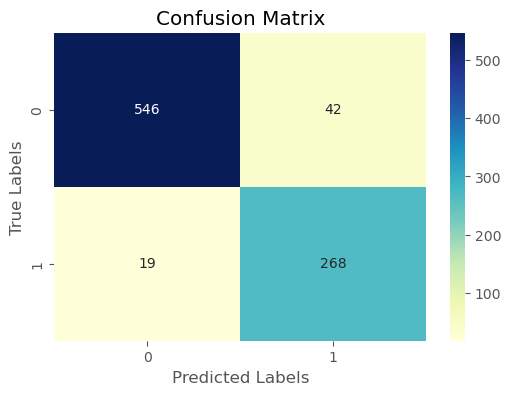

In [ ]:
# Test accuracy

info_plot(y_test, y_test_pred)

Model Accuracy: 0.94
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2324
           1       0.89      0.93      0.91      1173

    accuracy                           0.94      3497
   macro avg       0.93      0.94      0.93      3497
weighted avg       0.94      0.94      0.94      3497

-------------------------------------------------------


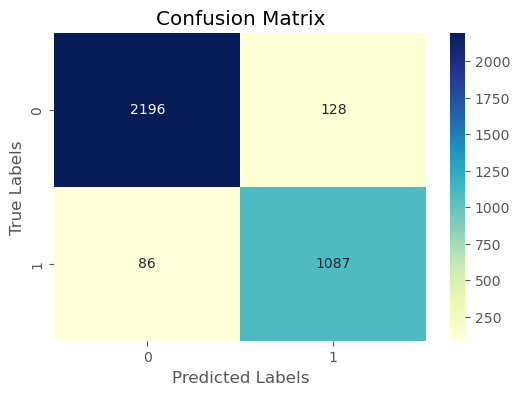

In [ ]:
# Train accuracy


info_plot(y_train, y_train_pred)

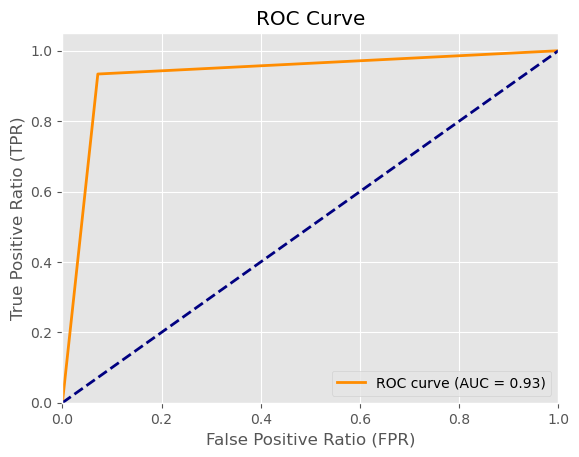

In [ ]:
# Calculate ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate AUC

roc_auc = auc(fpr, tpr)


# Plotting ROC curve

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Ratio (FPR)')
plt.ylabel('True Positive Ratio (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<h2 style="color:#4682b4 ;font-family: Arial;  font-size: 15px;  padding: 10px;"> NOTES </h2>

* The ROC curve in the image is located near the top left corner. This indicates that the model has a high performance.

* The area under the curve (AUC) is stated as 0.93. This value indicates that the model has a very good performance.

* Analyze the differences between customers with high and low purchasing intention.

In [ ]:
rfm_df.head()

CustomerID  recency  frequency  monetary Recency_Score Frequency_Score  \
0    12346.0      327          2     14.56             1               2   
1    12347.0        3          7   3877.44             5               4   
2    12348.0       76          4    557.57             2               3   
3    12349.0       20          1   1336.65             4               1   
4    12350.0      311          1    301.90             1               1   

  Monetary_Score RF_SCORE      Segment  Actual_Next_Month  Purchase_Next_Month  
0              1       12  hibernating                  0                    0  
1              5       54    champions                  1                    1  
2              3       23      at_Risk                  0                    0  
3              4       41    promising                  1                    1  
4              2       11  hibernating                  0                    0

In [ ]:
print(rfm_df.recency.max())
print(rfm_df.frequency.max())
print(rfm_df.monetary.max())
print(rfm_df.recency.min())
print(rfm_df.frequency.min())
print(rfm_df.monetary.min())

375
248
110093.96
2
1
-470.46999999999997


In [ ]:
# Recency groups

recency_gruplari = [0, 15, 40, 100, 380]
recency_etiketleri = ['Very Close', 'Close', 'Medium', 'Far']
rfm_df['Recency_Group'] = pd.cut(rfm_df['recency'], bins=recency_gruplari, labels=recency_etiketleri, right=False)

# Frequency groups

frequency_gruplari = [0,2,3,4, 250]
frequency_etiketleri = ['Very Little', 'Little', 'Moderate', 'A lot']
rfm_df['Frequency_Group'] = pd.cut(rfm_df['frequency'], bins=frequency_gruplari, labels=frequency_etiketleri, right=False)

# Monetary groups

monetary_gruplari = [-10000, 250,600, 1500,  120000]
monetary_etiketleri = ['Low', 'Medium', 'High', 'Very High']
rfm_df['Monetary_Group'] = pd.cut(rfm_df['monetary'], bins=monetary_gruplari, labels=monetary_etiketleri, right=False)

In [ ]:
# Average purchase probability by groups
groups = rfm_df.groupby(['Recency_Group', 'Frequency_Group', 'Monetary_Group'])['Purchase_Next_Month'].mean().reset_index()

# Grupları ve ortalama olasılıkları yazdırma
print(groups)

   Recency_Group Frequency_Group Monetary_Group  Purchase_Next_Month
0     Very Close     Very Little            Low             0.950000
1     Very Close     Very Little         Medium             0.863636
2     Very Close     Very Little           High             1.000000
3     Very Close     Very Little      Very High                  NaN
4     Very Close          Little            Low             0.958333
..           ...             ...            ...                  ...
59           Far        Moderate      Very High             0.000000
60           Far           A lot            Low             0.000000
61           Far           A lot         Medium             0.000000
62           Far           A lot           High             0.000000
63           Far           A lot      Very High             0.000000

[64 rows x 4 columns]


In [ ]:
groups.isnull().sum()

Recency_Group          0
Frequency_Group        0
Monetary_Group         0
Purchase_Next_Month    1
dtype: int64

In [ ]:
# rfm_df.Purchase_Next_Month.value_counts()

In [ ]:
rfm_df.isnull().sum()

CustomerID             0
recency                0
frequency              0
monetary               0
Recency_Score          0
Frequency_Score        0
Monetary_Score         0
RF_SCORE               0
Segment                0
Actual_Next_Month      0
Purchase_Next_Month    0
Recency_Group          0
Frequency_Group        0
Monetary_Group         0
dtype: int64

In [ ]:
groups.Purchase_Next_Month.value_counts()

0.000000    37
1.000000    10
0.950000     1
0.794118     1
0.866337     1
0.761905     1
0.900000     1
0.775862     1
0.521739     1
0.400000     1
0.360465     1
0.863636     1
0.454545     1
0.080645     1
0.833333     1
0.877551     1
0.958333     1
0.884328     1
Name: Purchase_Next_Month, dtype: int64

In [ ]:
groups.tail()

Recency_Group Frequency_Group Monetary_Group  Purchase_Next_Month
59           Far        Moderate      Very High                  0.0
60           Far           A lot            Low                  0.0
61           Far           A lot         Medium                  0.0
62           Far           A lot           High                  0.0
63           Far           A lot      Very High                  0.0

In [ ]:
# Set threshold values

high_threshold  = 0.7
middle_threshold_lower = 0.3

# Creating purchase intention categories

def set_purchase_tendency(possibility):
    if possibility >= high_threshold :
        return 'High Trend'
    elif possibility >= middle_threshold_lower:
        return 'Medium Trend'
    else:
        return 'Low Trend'

# groups['Purchase_Trend']

groups['Purchase_Trend'] = groups['Purchase_Next_Month'].apply(set_purchase_tendency)

# Show the result

print(groups.head())

  Recency_Group Frequency_Group Monetary_Group  Purchase_Next_Month  \
0    Very Close     Very Little            Low             0.950000   
1    Very Close     Very Little         Medium             0.863636   
2    Very Close     Very Little           High             1.000000   
3    Very Close     Very Little      Very High                  NaN   
4    Very Close          Little            Low             0.958333   

  Purchase_Trend  
0     High Trend  
1     High Trend  
2     High Trend  
3      Low Trend  
4     High Trend  


In [ ]:
groups.isnull().sum()

Recency_Group          0
Frequency_Group        0
Monetary_Group         0
Purchase_Next_Month    1
Purchase_Trend         0
dtype: int64

In [ ]:
groups.dropna(inplace = True)

In [ ]:
groups.isnull().sum()

Recency_Group          0
Frequency_Group        0
Monetary_Group         0
Purchase_Next_Month    0
Purchase_Trend         0
dtype: int64

In [ ]:
# Merge process

merge_df = pd.merge(rfm_df, groups, on=['Recency_Group', 'Frequency_Group', 'Monetary_Group'], how='left')

In [ ]:
merge_df.head()

CustomerID  recency  frequency  monetary Recency_Score Frequency_Score  \
0    12346.0      327          2     14.56             1               2   
1    12347.0        3          7   3877.44             5               4   
2    12348.0       76          4    557.57             2               3   
3    12349.0       20          1   1336.65             4               1   
4    12350.0      311          1    301.90             1               1   

  Monetary_Score RF_SCORE      Segment  Actual_Next_Month  \
0              1       12  hibernating                  0   
1              5       54    champions                  1   
2              3       23      at_Risk                  0   
3              4       41    promising                  1   
4              2       11  hibernating                  0   

   Purchase_Next_Month_x Recency_Group Frequency_Group Monetary_Group  \
0                      0           Far          Little            Low   
1                      1    Very Close           A lot      Very High   
2                      0        Medium           A lot         Medium   
3                      1         Close     Very Little           High   
4                      0           Far     Very Little         Medium   

   Purchase_Next_Month_y Purchase_Trend  
0               0.000000      Low Trend  
1               1.000000     High Trend  
2               0.000000      Low Trend  
3               0.454545   Medium Trend  
4               0.000000      Low Trend

In [ ]:
merge_df[["CustomerID",'Purchase_Trend']]

CustomerID Purchase_Trend
0       12346.0      Low Trend
1       12347.0     High Trend
2       12348.0      Low Trend
3       12349.0   Medium Trend
4       12350.0      Low Trend
...         ...            ...
4367    18280.0      Low Trend
4368    18281.0      Low Trend
4369    18282.0     High Trend
4370    18283.0     High Trend
4371    18287.0      Low Trend

[4372 rows x 2 columns]

In [ ]:
merge_df.Purchase_Trend.value_counts()

Low Trend       2664
High Trend      1560
Medium Trend     148
Name: Purchase_Trend, dtype: int64